# Decorators
1. Decorators take any function as input
2. Output of decorator is a moduified version of input function
3. Output of decoratore is caller wrapper
4. Main purpuose of decorator is to modify the behaviour of any function

### Create a welcome decorator function which will welcome the user and thank the user at end

In [1]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User")
        x = func(*args, **kwargs)
        print(f"Function Results : {x}")
        print("Thank you!")
        return x

    return wrapper

# Applying decorator to a function

In [2]:
@welcome
def hypotenuse(a, b):
    return (a**2 + b**2) ** (1 / 2)

In [3]:
h1 = hypotenuse(3, 4)

Welcome User
Function Results : 5.0
Thank you!


In [4]:
h1

5.0

In [5]:
h2 = hypotenuse(4.5, 7.2)

Welcome User
Function Results : 8.490583018850943
Thank you!


In [6]:
h2

8.490583018850943

### Apply welcome decorator on simple intrest function

In [7]:
@welcome
def simple_intrest(p, n, r):
    i = (p * n * r) / 100
    a = p + i
    return {"intrest": i, "amount": a}

In [8]:
s1 = simple_intrest(50000, 4, 6.5)

Welcome User
Function Results : {'intrest': 13000.0, 'amount': 63000.0}
Thank you!


In [9]:
s1

{'intrest': 13000.0, 'amount': 63000.0}

In [10]:
s2 = simple_intrest(p=15000, n=5, r=7.1)

Welcome User
Function Results : {'intrest': 5325.0, 'amount': 20325.0}
Thank you!


In [11]:
s2

{'intrest': 5325.0, 'amount': 20325.0}

# Write a decorator function to measure time for a given function to execute

In [12]:
import time

In [16]:
start = time.perf_counter()
time.sleep(1)
print("Hello")
time.sleep(2)
print("Utkarsh")
stop = time.perf_counter()
elapsed = stop - start
print(f"Time required for execution : {elapsed:.3f} sec")

Hello
Utkarsh
Time required for execution : 3.004 sec


In [17]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        x = func(*args, **kwargs)
        print(f"Results : {x}")
        stop = time.perf_counter()
        elapsed = stop - start
        print(f"Time required for execution : {elapsed:.4f} sec")
        return x

    return wrapper

In [20]:
@measure_time
def square(n):
    time.sleep(2)
    return n**2

In [21]:
s1 = square(5.2)

Results : 27.040000000000003
Time required for execution : 2.0005 sec


In [22]:
s1

27.040000000000003

In [23]:
@measure_time
def square_list(nums: list) -> list:
    s = []
    for i in nums:
        time.sleep(1)
        s.append(i**2)
    return s

In [24]:
a = [3, 4, 5, 6]

In [25]:
a1 = square_list(a)

Results : [9, 16, 25, 36]
Time required for execution : 4.0037 sec


In [26]:
b = [3, 4, 19, 11, 12, 13, 14, 15, 17, 19, 20, 21]
b

[3, 4, 19, 11, 12, 13, 14, 15, 17, 19, 20, 21]

In [28]:
len(b)

12

In [29]:
b1 = square_list(b)

Results : [9, 16, 361, 121, 144, 169, 196, 225, 289, 361, 400, 441]
Time required for execution : 12.0099 sec


### Write a function to download any file from internet

In [30]:
url = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv


In [31]:
url.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'refs',
 'heads',
 'main',
 'artifacts',
 'data.csv']

In [33]:
url.split("/")[-1]

'data.csv'

In [34]:
from urllib.request import urlretrieve

In [35]:
@measure_time
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"Starting download for {filename} ...")
    urlretrieve(url, filename)
    print(f"{filename} download complete.")

In [36]:
url

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv'

In [38]:
download_file(url)

Starting download for data.csv ...
data.csv download complete.
Results : None
Time required for execution : 0.9514 sec


### Import above in pandas dataframe

In [39]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [40]:
df.shape

(193573, 11)

In [48]:
a = (
    df.groupby(by="cut")
    .agg({"price": "mean"})
    .sort_values(by="price", ascending=False)
    .round(2)
)

In [49]:
a

,price
cut,
Fair,4810.50
Premium,4797.06
Good,4191.47
Very Good,4165.30
Ideal,3396.19


<Axes: xlabel='cut'>

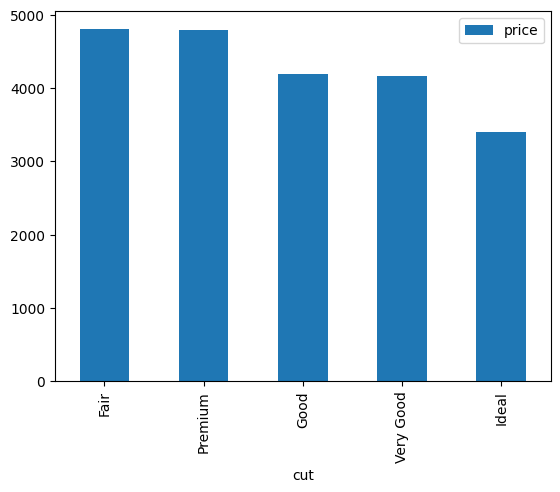

In [50]:
a.plot(kind="bar")